# Multiple Linear Regression

## Objectives

-   Use scikit-learn to implement Multiple Linear Regression
-   Create a model, train,test and use the model


<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#understanding-data">Understanding the Data</a></li>
        <li><a href="#reading_data">Reading the Data in</a></li>
        <li><a href="#multiple_regression_model">Multiple Regression Model</a></li>
        <li><a href="#prediction">Prediction</a></li>
        <li><a href="#practice">Practice</a></li>
    </ol>
</div>
<br>
<hr>


### Importing Needed packages


In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

<h2 id="understanding_data">Understanding the Data</h2>

-   **MODELYEAR** e.g. 2014
-   **MAKE** e.g. Acura
-   **MODEL** e.g. ILX
-   **VEHICLE CLASS** e.g. SUV
-   **ENGINE SIZE** e.g. 4.7
-   **CYLINDERS** e.g 6
-   **TRANSMISSION** e.g. A6
-   **FUELTYPE** e.g. z
-   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
-   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
-   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
-   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


<h2 id="reading_data">Reading the data in</h2>


In [16]:
df = pd.read_csv("FuelConsumptionCo2.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Lets select some features that we want to use for regression.


In [17]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


Lets plot Emission values with respect to Engine size:


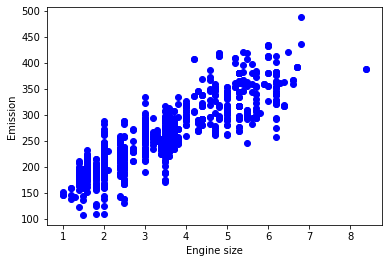

In [18]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### Creating train and test dataset

Train / Test Split melibatkan pemisahan set data menjadi set pelatihan dan pengujian masing-masing, yang saling eksklusif. Setelah itu, Anda berlatih dengan set pelatihan dan menguji dengan set pengujian.
Ini akan memberikan evaluasi yang lebih akurat pada akurasi out-of-sample karena dataset pengujian bukan bagian dari dataset yang telah digunakan untuk melatih data. Ini lebih realistis untuk masalah dunia nyata.

Ini berarti bahwa kami mengetahui hasil dari setiap titik data dalam kumpulan data ini, menjadikannya bagus untuk diuji! Dan karena data ini belum digunakan untuk melatih model, model tidak memiliki pengetahuan tentang hasil poin data ini. Jadi, pada dasarnya, ini benar-benar pengujian di luar sampel.


In [19]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

#### Train data distribution


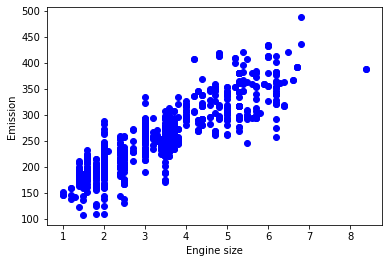

In [20]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

<h2 id="multiple_regression_model">Multiple Regression Model</h2>


Pada kenyataannya, ada banyak variabel yang memprediksi Co2emission. Jika ada lebih dari satu variabel independen, proses tersebut dipanggil multiple linear regression. For example, predicting co2emission using FUELCONSUMPTION_COMB, EngineSize and Cylinders of cars. Hal yang baik di sini adalah itu Multiple linear regression adalah perpanjangan dari simple linear regression model.


In [21]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[10.09899254  8.25659323  9.66922888]]


As mentioned before, **Coefficient** and **Intercept** , adalah parameter garis fit. Mengingat bahwa itu adalah multiple linear regression, dengan 3 parameters, dan mengetahui bahwa parameternya adalah intersep dan koefisien hyperplane, sklearn dapat memperkirakannya dari data kami. Scikit-learn menggunakan metode Ordinary Least Squares untuk mengatasi masalah ini.

#### Ordinary Least Squares (OLS)

OLS adalah metode untuk memperkirakan parameter yang tidak diketahui di linear regression model. OLS 
memilih parameter fungsi linier dari satu set variabel penjelas dengan meminimalkan sum of tia mengkuadratkan perbedaan antara variabel dependen target dan yang diprediksi oleh fungsi linier. Dengan kata lain, mencoba meminimalkan jumlah squared errors (SSE) or mean squared error (MSE) antara target variable (y) dan hasil prediksi kami ($\hat{y}$) atas semua sampel didataset.

OLS dapat menemukan parameter terbaik menggunakan metode berikut:

```
- Memecahkan parameter model secara analitik menggunakan  closed-form equations
- Menggunakan algoritme pengoptimalan  (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)
```


<h2 id="prediction">Prediction</h2>


In [22]:
y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 484.89
Variance score: 0.87


**explained variance regression score:**  
Jika $ \ hat {y} $ adalah output target yang diperkirakan, y output target yang sesuai (benar), dan Var adalah Varians, kuadrat dari deviasi standar, maka varians yang dijelaskan diestimasi sebagai berikut:

$\texttt{explainedVariance}(y, \hat{y}) = 1 - \frac{Var{ y - \hat{y}}}{Var{y}}$  
The best possible score is 1.0, lower values are worse.


<h2 id="practice">Practice</h2>
Mencoba untuk menggunakan regresi linier berganda dengan kumpulan data yang sama tetapi kali ini digunakan __FUEL CONSUMPTION in CITY__ and 
__FUEL CONSUMPTION in HWY__ 
sebagai gantinya dari FUELCONSUMPTION_COMB. Apakah itu menghasilkan akurasi yang lebih baik?


In [14]:
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
print ('Coefficients: ', regr.coef_)
y_= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"% np.mean((y_ - y) ** 2))
print('Variance score: %.2f' % regr.score(x, y))



Coefficients:  [[11.84272437  6.91235876  4.99706054  4.76849635]]
Residual sum of squares: 488.04
Variance score: 0.87
